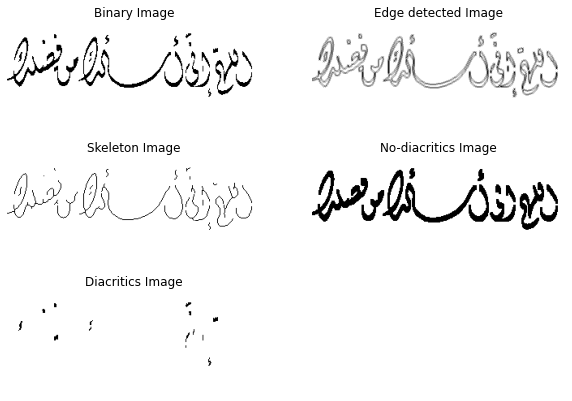

In [1]:
%run Preprocessing.ipynb



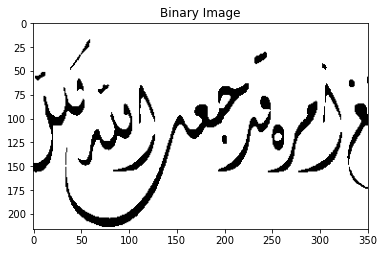

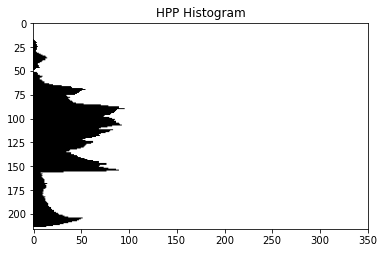

In [52]:
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image
 
img = cv2.imread('../ACdata_base/1/0019.jpg') 
Bimg, EdgeImage, SImage, TImage, DImage = preprocessing(img)

plt.imshow(Bimg, cmap=plt.gray())
plt.title("Binary Image")
plt.show()

img_HPP = Bimg
(h, w) = img_HPP.shape

 

# Initializes an array of length h, which is used to record the number of black spots in each row 
a = [0 for z in range(0, h)] 

# Record the crest of each row
for j in range(0,h): 
    for i in range(0,w): 
        if img_HPP[j,i] == 0: 
            a[j] += 1 
            img_HPP[j,i] = 1

     
    
for j in range(0,h):            # Traverse each row
    for i in range(0,a[j]):     # Start at the left point of the row that should be blackened to the right
        img_HPP[j,i] = 0        # Blackening


#print(img_HPP)    

plt.imshow(img_HPP, cmap=plt.gray())
plt.title("HPP Histogram")

plt.show()

In [24]:
from math import atan2, cos, sin, sqrt, pi
 
def drawAxis(img, p_, q_, color, scale):
    p = list(p_)
    q = list(q_)
    
    
    
    ## [visualization1]
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)
    
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)
    
    
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)
    ## [visualization1]
    
    
def getOrientation(pts, img):
    ## [pca]
    # Construct a buffer used by the pca analysis
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
        
        
    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)
    
    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    ## [pca]
    
    ## [visualization]
    # Draw the principal components
    cv2.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    drawAxis(img, cntr, p1, (255, 255, 0), 1)
    #drawAxis(img, cntr, p2, (0, 0, 0), 5)
    
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    ## [visualization]
    
    
    # Label with the rotation angle
    #label = "  Rotation Angle: " + str(-int(np.rad2deg(angle)) - 90) + " degrees"
    #textbox = cv2.rectangle(img, (cntr[0], cntr[1]-25), (cntr[0] + 250, cntr[1] + 10), (255,255,255), -1)
    #cv2.putText(img, label, (cntr[0], cntr[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
    
    
    return angle



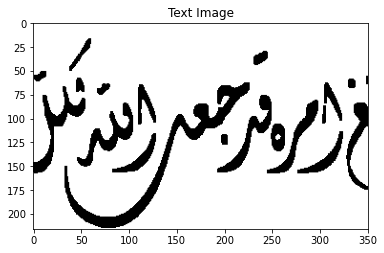

26.5
76.5
749.5
363.5
1115.0
794.0
948.0
63.0
924.0
914.0
110.5
3377.5
72.5
2.0
99.0
73.0
144.5
235.0
2.0
72445.0


True

In [25]:
# Load the image
img = cv2.imread('../ACdata_base/1/0019.jpg')
  
Bimg, EdgeImage, SImage, TImage, DImage = preprocessing(img)

plt.imshow(TImage, cmap=plt.gray())
plt.title("Text Image")
plt.show()    
    
    
cv2.imshow('Input Image', img)
 
    
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Convert image to binary
_, bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
 
# Find all the contours in the thresholded image
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
 
for i, c in enumerate(contours):

    # Calculate the area of each contour
    area = cv2.contourArea(c)
    print(area)
    # Ignore contours that are too small or too large
    if area < 150 or 100000 < area:
        continue
        
    # Draw each contour only for visualisation purposes
    cv2.drawContours(img, contours, i, (0, 0, 255), 2)
    
    
    # Find the orientation of each shape
    getOrientation(c, img)
    
cv2.imshow('Output Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
  
# Save the output image to the current directory
cv2.imwrite("output_img.jpg", img)

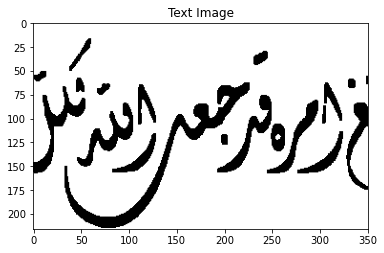

(216, 351)


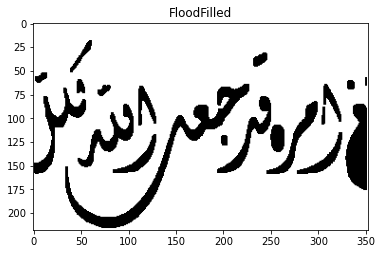

In [83]:
img = cv2.imread('../ACdata_base/1/0019.jpg') 
Bimg, EdgeImage, SImage, TImage, DImage = preprocessing(img)

plt.imshow(TImage, cmap=plt.gray())
plt.title("Text Image")
plt.show()


print(TImage.shape)
height, width = TImage.shape



mask = np.zeros(TImage.shape[:-1], np.uint8)
mask1 = np.zeros((height+2, width+2), np.uint8)      


cv2.floodFill(TImage, mask1, (0 , 0), 1)  
plt.imshow(mask1, cmap=plt.gray())
plt.title("FloodFilled")

plt.show()

In [ ]:
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill

flood_fill(cameraman, (155, 150), 255, tolerance=10)
